1. Load & Inspect 2019.csv

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load 2019 dataset
df = pd.read_csv("2019.csv")

# Inspect data
print(df.head())
print("\nColonnes:", df.columns.tolist())
print("\nShape:", df.shape)
print("\nInfo:")
print(df.info())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

DESCRIPTIVE STATISTICS
       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000

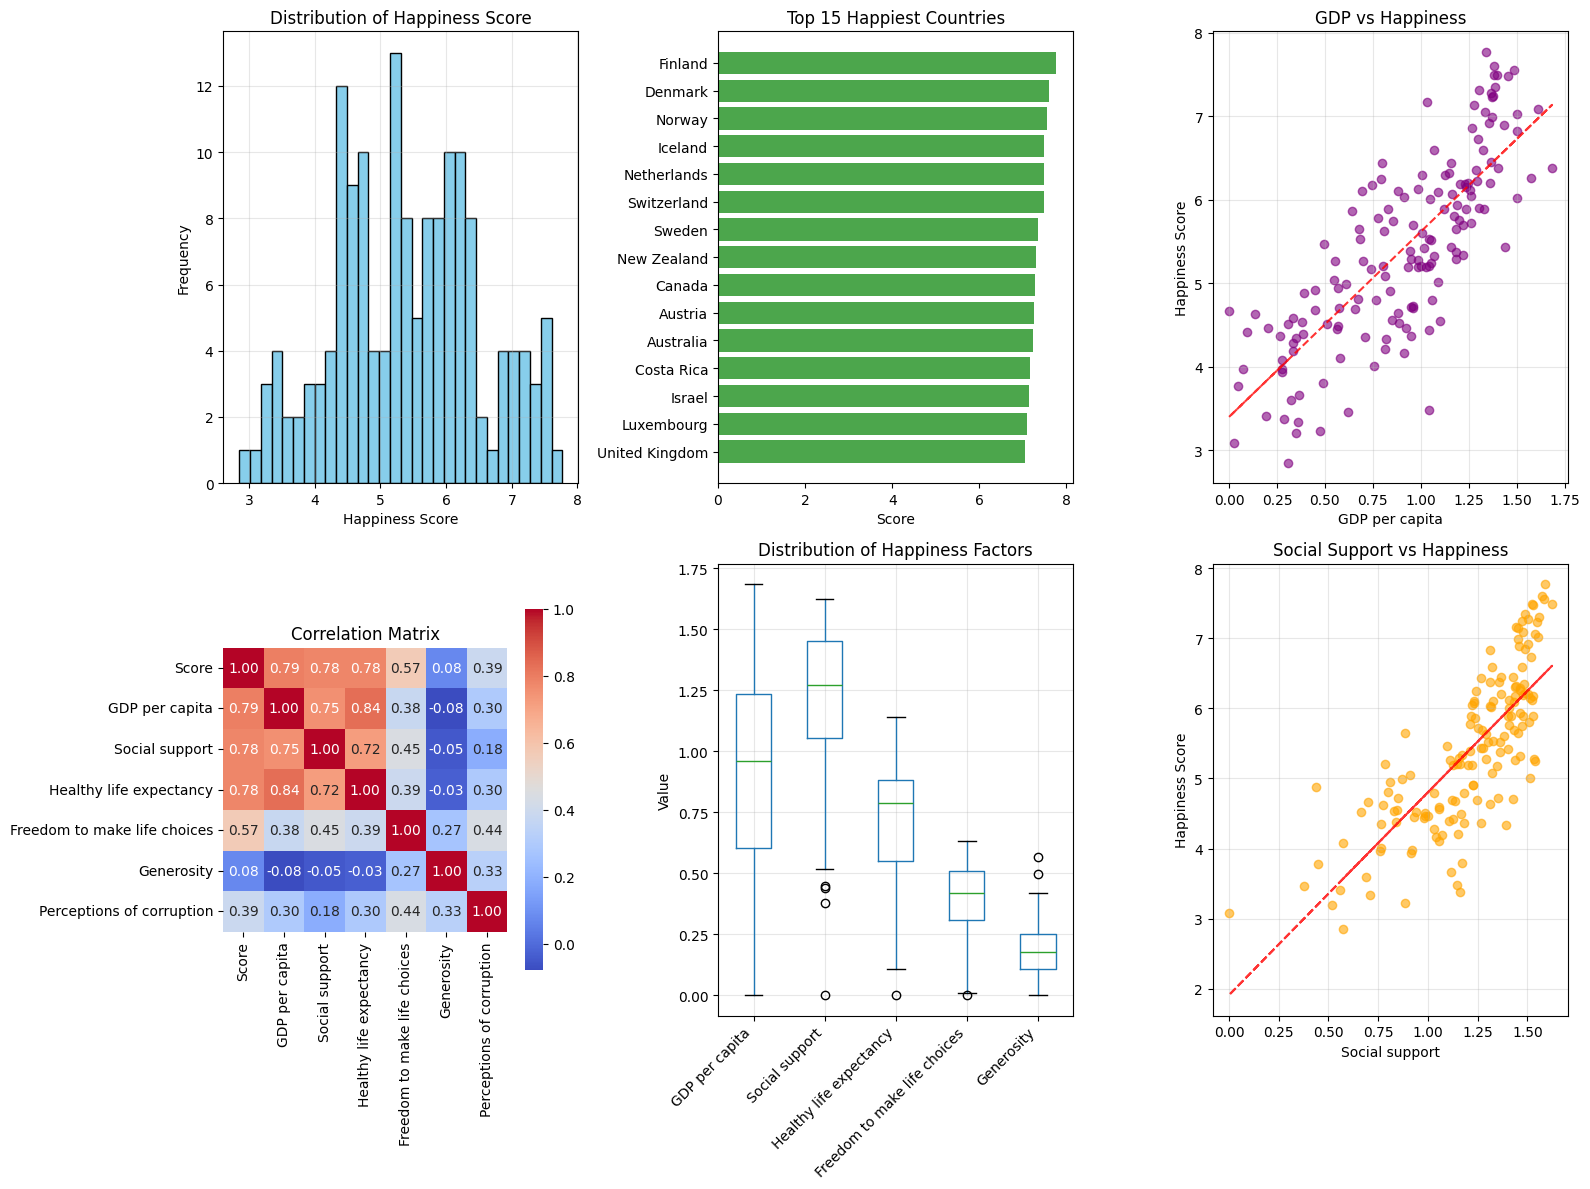

STATISTICS BY SCORE CATEGORY
           GDP per capita  Social support  Healthy life expectancy
Category                                                          
Low              0.343750        0.746688                 0.421438
Medium           0.608326        1.006488                 0.529070
High             0.988022        1.296911                 0.788756
Very High        1.251615        1.442077                 0.925981


CHAMPIONS BY FACTOR
GDP per capita: Qatar (1.684)
Social support: Iceland (1.624)
Healthy life expectancy: Singapore (1.141)
Freedom to make life choices: Uzbekistan (0.631)
Generosity: Myanmar (0.566)


In [2]:
# 1. Descriptive statistics
print("=" * 50)
print("DESCRIPTIVE STATISTICS")
print("=" * 50)
print(df.describe())
print("\n")

# 2. Top 10 happiest countries
print("=" * 50)
print("TOP 10 HAPPIEST COUNTRIES")
print("=" * 50)
print(df[['Country or region', 'Score']].head(10))
print("\n")

# 3. Bottom 10 least happy countries
print("=" * 50)
print("TOP 10 LEAST HAPPY COUNTRIES")
print("=" * 50)
print(df[['Country or region', 'Score']].tail(10))
print("\n")

# 4. Correlations between variables
print("=" * 50)
print("CORRELATION MATRIX")
print("=" * 50)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix['Score'].sort_values(ascending=False))
print("\n")

# Visualizations
fig = plt.figure(figsize=(16, 12))

# 1. Happiness Score distribution
plt.subplot(2, 3, 1)
plt.hist(df['Score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Score')
plt.grid(alpha=0.3)

# 2. Top 15 happiest countries
plt.subplot(2, 3, 2)
top15 = df.nsmallest(15, 'Overall rank')
plt.barh(top15['Country or region'], top15['Score'], color='green', alpha=0.7)
plt.xlabel('Score')
plt.title('Top 15 Happiest Countries')
plt.gca().invert_yaxis()

# 3. GDP vs Score relationship
plt.subplot(2, 3, 3)
plt.scatter(df['GDP per capita'], df['Score'], alpha=0.6, color='purple')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.title('GDP vs Happiness')
plt.grid(alpha=0.3)
z = np.polyfit(df['GDP per capita'], df['Score'], 1)
p = np.poly1d(z)
plt.plot(df['GDP per capita'], p(df['GDP per capita']), "r--", alpha=0.8)

# 4. Correlation matrix heatmap
plt.subplot(2, 3, 4)
features = ['Score', 'GDP per capita', 'Social support', 
            'Healthy life expectancy', 'Freedom to make life choices', 
            'Generosity', 'Perceptions of corruption']
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix')

# 5. Boxplot of contributing factors
plt.subplot(2, 3, 5)
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 
           'Freedom to make life choices', 'Generosity']
df[factors].boxplot()
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Distribution of Happiness Factors')
plt.grid(alpha=0.3)

# 6. Social Support vs Score relationship
plt.subplot(2, 3, 6)
plt.scatter(df['Social support'], df['Score'], alpha=0.6, color='orange')
plt.xlabel('Social support')
plt.ylabel('Happiness Score')
plt.title('Social Support vs Happiness')
plt.grid(alpha=0.3)
z = np.polyfit(df['Social support'], df['Score'], 1)
p = np.poly1d(z)
plt.plot(df['Social support'], p(df['Social support']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# 7. Analysis by score category
print("=" * 50)
print("STATISTICS BY SCORE CATEGORY")
print("=" * 50)
df['Category'] = pd.cut(df['Score'], bins=[0, 4, 5, 6, 8], 
                         labels=['Low', 'Medium', 'High', 'Very High'])
print(df.groupby('Category')[['GDP per capita', 'Social support', 
                                'Healthy life expectancy']].mean())
print("\n")

# 8. Countries with best and worst values for each factor
print("=" * 50)
print("CHAMPIONS BY FACTOR")
print("=" * 50)
for col in ['GDP per capita', 'Social support', 'Healthy life expectancy', 
            'Freedom to make life choices', 'Generosity']:
    best = df.loc[df[col].idxmax()]
    print(f"{col}: {best['Country or region']} ({best[col]:.3f})")